In [14]:
import pandas as pd
import os

In [15]:
df1 = pd.read_csv("/Users/lisafranchetti/table1_8-10.csv")

In [16]:
df1.rename(columns={'col1': 'age_8-10_years'}, inplace=True)
df1.rename(columns={'col2': '2017_%'}, inplace=True)
df1.rename(columns={'col3': '2020_%'}, inplace=True)
df1.rename(columns={'col4': '2021_%'}, inplace=True)
df1.rename(columns={'col5': '2022_%'}, inplace=True)
df1.rename(columns={'col6': '2023_%'}, inplace=True)

In [17]:
# Drop first 5 rows and last rows are they are not required/empty
df1 = df1.drop(index=[0, 1, 2, 3, 4, 26, 27, 28])
df1.head(27)

,age_8-10_years,2017_%,2020_%,2021_%,2022_%,2023_%
5,,,,,NaN,
6,All,,,,NaN,
7,Unlikely to have a disorder,75.771213510442,74.2597793439009,74.6996536343733,71.8577153480544,72.227267168608
8,Possible disorder,12.9962483151784,9.7083806859394,7.55868797656781,11.3042838803803,12.1077148248046
9,Probable disorder,11.2325381743796,16.0318399701597,17.7416583890589,16.8380007715654,15.6650180065874
10,,NaN,NaN,NaN,NaN,NaN
11,Boys/young men,NaN,NaN,NaN,NaN,NaN
12,Unlikely to have a disorder,70.3126757116213,68.7329050459036,71.192450449121,67.0808919359119,65.7038184299751
13,Possible disorder,16.4122070702663,11.2679067955348,7.95258607605427,12.6294078015435,16.6222911715752
14,Probable disorder,13.2751172181126,19.9991881585617,20.8549634748246,20.2897002625448,17.6738903984497


In [18]:
# Convert the columns to numeric, coercing errors to NaN
df1[['2017_%', '2020_%', '2021_%', '2022_%', '2023_%']] = df1[['2017_%', '2020_%', '2021_%', '2022_%', '2023_%']].apply(pd.to_numeric, errors='coerce')
# round down to 2 decimal places
df1[['2017_%', '2020_%', '2021_%', '2022_%', '2023_%']] = df1[['2017_%', '2020_%', '2021_%', '2022_%', '2023_%']].fillna(0).round(2)
# replace 0.00 with blank spaces
df1[['2017_%', '2020_%', '2021_%', '2022_%', '2023_%']] = df1[['2017_%', '2020_%', '2021_%', '2022_%', '2023_%']].replace(0.00, '')

In [19]:
# reset the index and the data should now be tidied and easy to understand
df1 = df1.reset_index(drop=True)
df1.head(22)

,age_8-10_years,2017_%,2020_%,2021_%,2022_%,2023_%
0,,,,,,
1,All,,,,,
2,Unlikely to have a disorder,75.77,74.26,74.7,71.86,72.23
3,Possible disorder,13.0,9.71,7.56,11.3,12.11
4,Probable disorder,11.23,16.03,17.74,16.84,15.67
5,,,,,,
6,Boys/young men,,,,,
7,Unlikely to have a disorder,70.31,68.73,71.19,67.08,65.7
8,Possible disorder,16.41,11.27,7.95,12.63,16.62
9,Probable disorder,13.28,20.0,20.85,20.29,17.67


In [20]:
df1.to_pickle("8-10_clean.pkl")

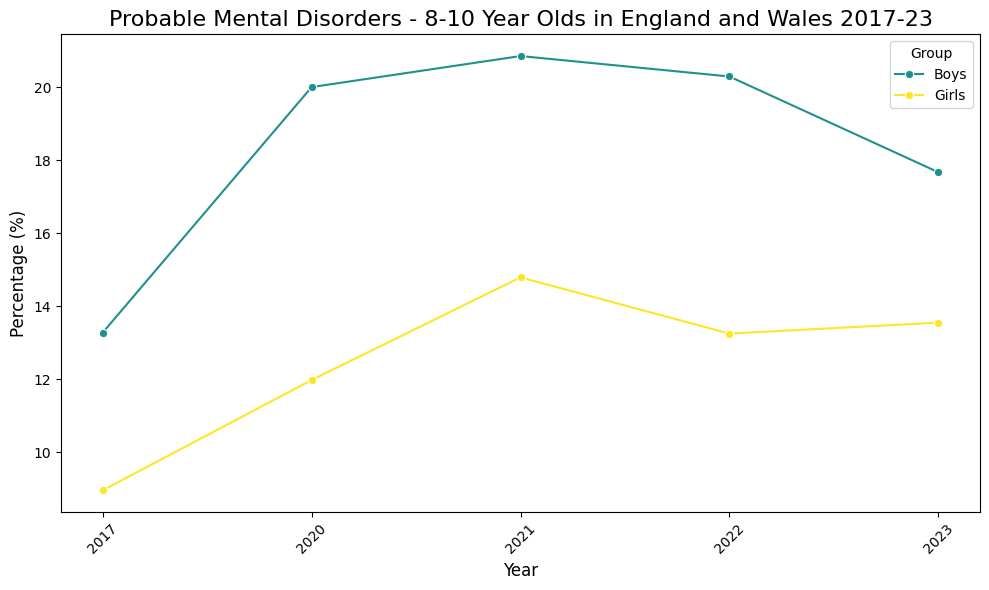

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Year': ['2017', '2020', '2021', '2022', '2023'],
    'Boys/Young Men': [13.28, 20.0,	20.85, 20.29, 17.67], 
    'Girls/Young Women': [8.96, 11.98, 14.79, 13.25, 13.55]  
}

# Create a DataFrame 
df_plot = pd.DataFrame(data)

# Plotting line graph
plt.figure(figsize=(10, 6))
custom_palette = ['#20908D',  # Teal
                  '#FDE725',  # Yellow
                 ]  
sns.lineplot(data=df_plot, x='Year', y='Boys/Young Men', label='Boys', marker='o', color='#20908D')
sns.lineplot(data=df_plot, x='Year', y='Girls/Young Women', label='Girls', marker='o', color='#FDE725')

# Customise
plt.title('Probable Mental Disorders - 8-10 Year Olds in England and Wales 2017-23', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Group')

plt.tight_layout()
plt.show()


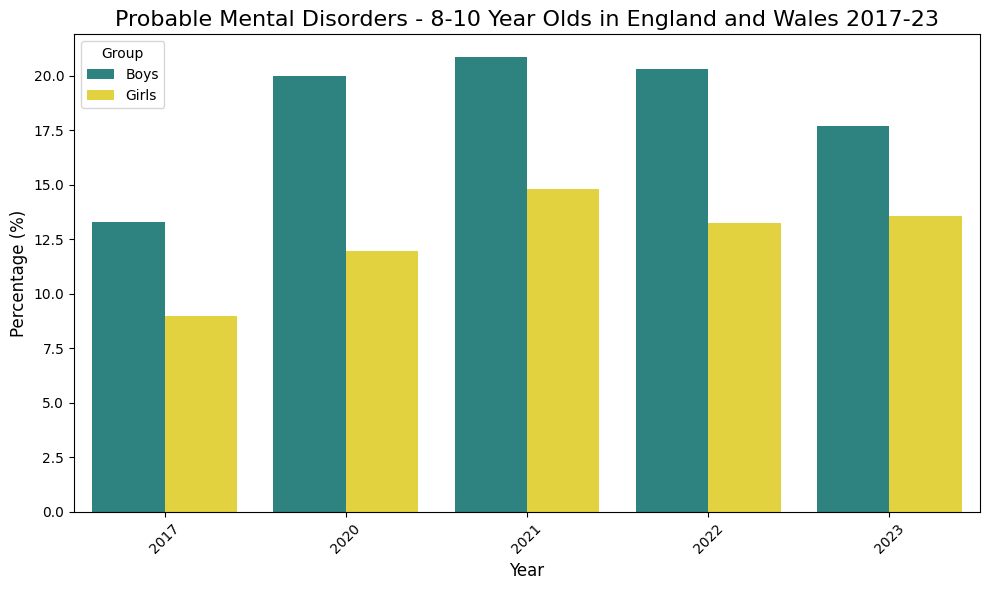

In [3]:
df_plot = pd.DataFrame(data)

# Reshape the data to long format (for easier plotting)
df_plot_long = df_plot.melt(id_vars='Year', var_name='Group', value_name='Percentage')

# Plotting as a bar chart
plt.figure(figsize=(10, 6))
custom_palette = ['#20908D',  # Teal
                  '#FDE725',  # Yellow
                 ]
sns.barplot(data=df_plot_long, x='Year', y='Percentage', hue='Group', palette=custom_palette, hue_order=['Boys/Young Men', 'Girls/Young Women'])

# Customise
plt.title('Probable Mental Disorders - 8-10 Year Olds in England and Wales 2017-23', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=[handles[0], handles[1]], labels=['Boys', 'Girls'], title='Group', loc='upper left')
plt.tight_layout()
plt.show()
